<a href="https://colab.research.google.com/github/Mohamedragih1/Boston-Housing/blob/main/Boston_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [273]:
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from torchsummary import summary
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from tqdm import tqdm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

#Data Loading

Construct Data Frame

In [274]:
df =pd.read_csv('/content/Housing-1.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


Check Nulls

In [275]:
print(df.isnull().any())

price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
prefarea            False
furnishingstatus    False
dtype: bool


Encoding Categorical Data

In [276]:
binary_categorical_columns = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

In [277]:
for column in binary_categorical_columns:
  df[column] = df[column].map({'yes': 1, 'no': 0})
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [278]:
df = pd.get_dummies(df, columns=['furnishingstatus']).astype(int)

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


Constructing features and labels

In [279]:
X = df.drop('price', axis = 1)
y = df['price']

In [280]:
display(X)
display(y)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


Normalization

In [281]:
scaler = MinMaxScaler()
area = scaler.fit_transform(df[['area']])
X['area'] = area

X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0.396564,4,2,3,1,0,0,0,1,2,1,1,0,0
1,0.502405,4,4,4,1,0,0,0,1,3,0,1,0,0
2,0.571134,3,2,2,1,0,1,0,0,2,1,0,1,0
3,0.402062,4,2,2,1,0,1,0,1,3,1,1,0,0
4,0.396564,4,1,2,1,1,1,0,1,2,0,1,0,0


Train, Validation and Test splitting

In [282]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

input_size = X_train.shape[1]
print(input_size)

14


Loading Data using torch loaders

In [283]:
X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
X_val = torch.tensor(X_val.values, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

In [284]:
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

#Model Construction

In [285]:
class Model(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 128)
        self.fc4 = nn.Linear(128, 264)
        self.fc5 = nn.Linear(264, 128)
        self.fc6 = nn.Linear(128, 64)
        self.fc7 = nn.Linear(64, 32)
        self.fc8 = nn.Linear(32, 16)
        self.fc9 = nn.Linear(16, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = F.relu(self.fc8(x))
        x = self.fc9(x)
        return x


input_size = X_train.shape[1]
model = Model(input_size)
summary(model, input_size = X_train.shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 436, 32]             480
            Linear-2              [-1, 436, 64]           2,112
            Linear-3             [-1, 436, 128]           8,320
            Linear-4             [-1, 436, 264]          34,056
            Linear-5             [-1, 436, 128]          33,920
            Linear-6              [-1, 436, 64]           8,256
            Linear-7              [-1, 436, 32]           2,080
            Linear-8              [-1, 436, 16]             528
            Linear-9               [-1, 436, 1]              17
Total params: 89,769
Trainable params: 89,769
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 2.42
Params size (MB): 0.34
Estimated Total Size (MB): 2.79
---------------------------------------------

#Training Loop

In [286]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    train_loss = 0

    # Training phase
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        preds = model(X_batch)
        loss = criterion(preds.squeeze(), y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * X_batch.size(0)

    # Calculate average training loss
    avg_train_loss = train_loss / len(train_loader.dataset)

    # Validation phase
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_val_batch, y_val_batch in val_loader:
            val_preds = model(X_val_batch)  # Forward pass
            loss = criterion(val_preds.squeeze(), y_val_batch)
            val_loss += loss.item() * X_val_batch.size(0)

    # Calculate average validation loss
    avg_val_loss = val_loss / len(val_loader.dataset)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}')

Epoch [1/200], Train Loss: 25234792191267.2305, Validation Loss: 30424638937618.9648
Epoch [2/200], Train Loss: 25234777626642.7891, Validation Loss: 30424575324008.2969
Epoch [3/200], Train Loss: 25234392885830.4570, Validation Loss: 30422956167319.7031
Epoch [4/200], Train Loss: 25227514438909.6523, Validation Loss: 30398164490770.9648
Epoch [5/200], Train Loss: 25143232612859.3047, Validation Loss: 30138423283256.8906
Epoch [6/200], Train Loss: 24429401648588.3320, Validation Loss: 28183109440246.5195
Epoch [7/200], Train Loss: 20099498570817.7617, Validation Loss: 17959693407573.3320
Epoch [8/200], Train Loss: 6293445810044.4775, Validation Loss: 2715370739029.3335
Epoch [9/200], Train Loss: 2407171436882.2017, Validation Loss: 3054145673140.1479
Epoch [10/200], Train Loss: 1615315327596.0366, Validation Loss: 2430584145692.4443
Epoch [11/200], Train Loss: 1401539199577.2478, Validation Loss: 2348332620913.7778
Epoch [12/200], Train Loss: 1371244220979.6697, Validation Loss: 239233

#Test Evaluation

In [289]:
model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for X_test_batch, y_test_batch in test_loader:
        test_preds = model(X_test_batch)
        y_pred.extend(test_preds.squeeze().tolist())
        y_true.extend(y_test_batch.tolist())

y_pred = np.array(y_pred)
y_true = np.array(y_true)

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f'Test MSE: {mse:.4f}, Test MAE: {mae:.4f}, R^2: {r2:.4f}')

Test MSE: 1830087904388.9421, Test MAE: 1017230.7136, R^2: 0.6632


#Ploting

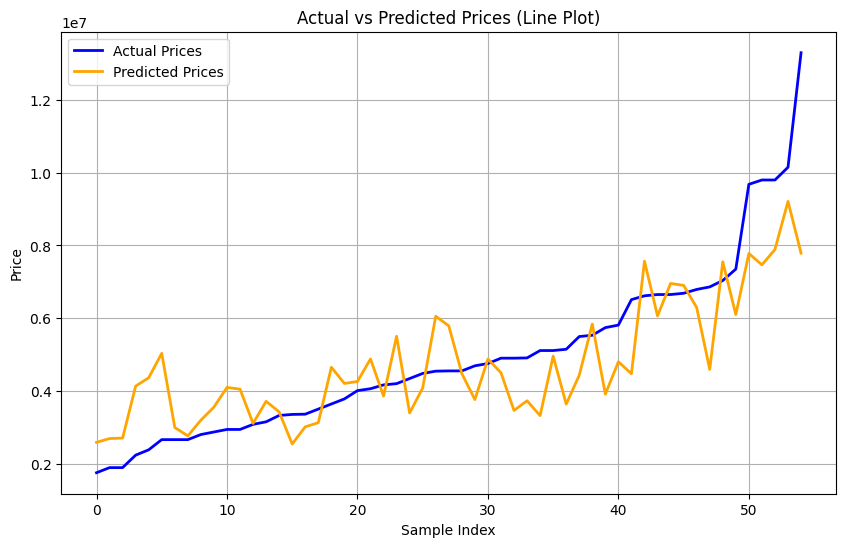

In [291]:
plt.figure(figsize=(10, 6))

sorted_indices = np.argsort(y_true)
plt.plot(np.array(y_true)[sorted_indices], label='Actual Prices', color='blue', linewidth=2)
plt.plot(np.array(y_pred)[sorted_indices], label='Predicted Prices', color='orange', linewidth=2)

plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices (Line Plot)')
plt.legend()
plt.grid(True)

plt.show()
